In [1]:
import pandas as pd
import cv2
import os
from IPython.display import Image
from matplotlib import pyplot as plt
import requests

%matplotlib inline

In [2]:
df = pd.read_csv('data/USvideos.csv')
df_unique = df.drop_duplicates(subset='video_id', keep='last')

# DAY 2

So far we have downloaded the data set we want to work with. Is only using videos from trending page a good idea? 

What are the questions we can ask?

0. Just to be safe, let's make sure we have an image for each (unique) video id

1. What are the properties of downloaded thumbnails? For example, are they all the same size?

Let's start here


In [3]:
# Quick check if we have same number of thumbnails as there are unique ids
assert(len(df_unique['video_id']) == len(os.listdir('./data/imgs')))

In [28]:
Imgs = {}
for filename in os.listdir('./data/imgs'):
    #filename[:-4] == video_id == vid
    Imgs[filename[:-4]] = cv2.imread(f'./data/imgs/{filename}',1)

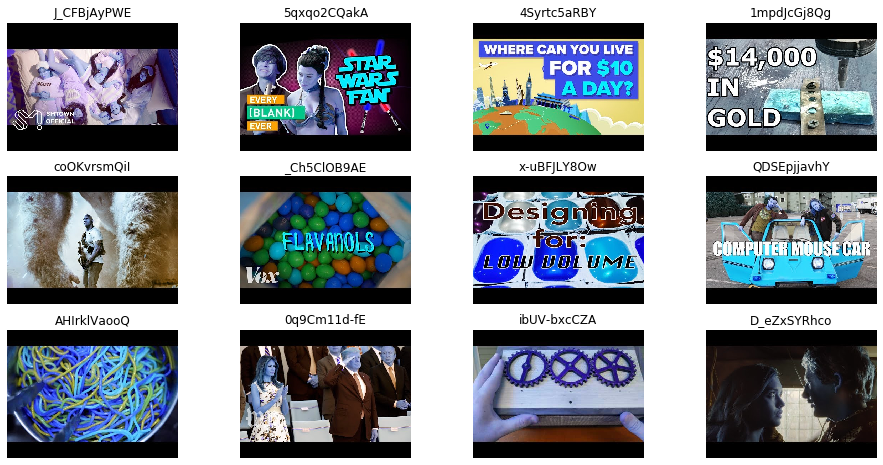

In [36]:
# Let's look at some of the images
fig = plt.figure(figsize=(16, 8))
columns = 4
rows = 3
i = 1

for vid, img in Imgs.items():
    fig.add_subplot(rows, columns, i)
    plt.title(vid)
    plt.axis('off')
    plt.imshow(img)
    i += 1
    if i == 13:
        break
        # I KNOW IT's UGLY, OK?

### Funny observation: Most of these aren't so bad

Okay so now let's get their dimensions

In [43]:
list(Imgs.values())[0].shape

(360, 480, 3)

Aha! So Shape is 360 by 480 (with 3 colors, making it rgb). Let's see if they are all shaped like that.

In [50]:
shapes = set()
for each in Imgs.values():
    shapes.add(each.shape)
shapes

{(90, 120, 3), (97, 130, 3), (360, 480, 3)}

Oh no, bad new comrades. Instead of just keeping everything in 360x480 format, youtube also has some 90x120
and.... 97x130 ??? Let's see one of them ugly fellas

In [88]:
count = 0
for key, each in Imgs.items():
    if each.shape == (97, 130, 3):
        print(key)
        plt.imshow(each)
        count += 1
print(count)

wFEAoF7RC7Y


Okay, so we have .... 1 video with thumbnail having this resolution. 1. 1. 1. Let that sink in

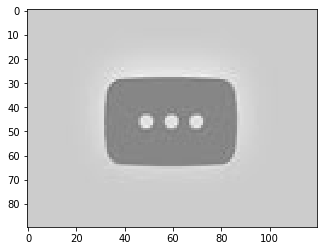

In [54]:
for each in Imgs.values():
    if each.shape == (90, 120, 3):
        plt.imshow(each)
        break
    

# huh?
What the hell is this? Let's investigate

In [92]:
count = 0
for key, value in Imgs.items():
    if value.shape == (90, 120, 3):
        count += 1
        print(key, end='\t\t')
    
print(count)

oOAohDViea4		-Q5pHm2Cfq4		RYs08kX3Ih4		NeH_wFJ8lZc		CBVGjS_EJok		k8IEepWOoAQ		3ekEfYNQJ1s		FmmLiydvFI0		VllA1V5M38E		pypRKeF3u6A		bT9HPXKP5dI		7YibRBd46oo		mdyegeGkdL4		VKW64fQwzRc		7ghv9MJHlfs		rz6-sdiGad8		s0Uxzh1E94U		_bVPfM04vOY		p7KHGUwqF24		rcGFrdopXxo		sefscV3GvWM		qFy5XyZsUeo		lRs72x7Lgtc		S_HixQBiVH0		fqQ7ymRr5X0		erybgSeUHus		bqbWMgkvedI		5_-NKRVn7IQ		3ILxrRlf3KY		Zn99TMv0vac		yc2m1LLa9l4		jjRXuZkeGRA		aAm6AHr14zY		RHUxyXZBXY8		q-giH_ezRTE		cpxwX6KvWbQ		5n32F7mS6Kk		eZSAIm_pzv4		VoUEz9yQJ8w		aHuIyhO7dtw		bJje-B9YLIU		l2P2qbr-_Ps		doHVMJnuvDA		dBTKW8NKAt4		bLKd4XXUWUo		0cZLo3AAan4		bhoFXkVy8JA		n_WjhsuLvw8		OG6qjAivguw		WOAIo9G9rIY		01AEuxSlIMg		CJv0I-xYuC4		07JQ4WZJIbg		5ELQ6u_5YYM		QB6TuFGuxj4		7dKownfx75E		lYtllIKb70M		76LcOD4aY-o		gXg2_yExgVY		5Q7mKQmNWSE		OblwxqKPyLg		-hg9t3PdhFE		NEmFS50lsTw		0devsSCkYRY		8ikZqUKIHbY		Ocq_0Yl1EEk		dUztYCMZYls		CvpwGru3s7s		4WnizmrnJlk		46TOhKEwtsE		p1jllz43xZE		gVutHEKBzHs		dKoIPuifJvE		wwX-RSqxEXc		9wD5OsJM-Pc		OPi9nTE70aA		aBL027wEtg8	

Well! Turns out we have some more bad news. Let's try looking up one of these videos in the browser using
( https://www.youtube.com/{video_id} ) 

In [89]:
from IPython.display import HTML

# Here is a video that works (and you should watch it BY THE WAY. Yang2020)
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/cTsEzmFamZ8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


In [91]:
# And here is a video with 90x120 shape from our list

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/WF82ABLw8s4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Don't worry, this is not something wrong with your code, it's just that this video is no longer available! This is good. This means that we should remove them. This is all part of data cleaning.

The good news is only 388 of the videos are unavailable and only 1 has the weird small resolution. I don't think that 1 video would harm us, but just in case, let's remove it also with all the unavailable ones.

In [100]:
imgs_cleaned = pd.DataFrame

temp_df = {'video_id':[], 'img':[]}

for key, value in Imgs.items():
    if value.shape == (360, 480, 3): # if good shape
        temp_df['video_id'].append(key)
        temp_df['img'].append(value)

df_cleaned = pd.DataFrame(temp_df)

In [102]:
df_cleaned.head()

,video_id,img
0,J_CFBjAyPWE,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,5qxqo2CQakA,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,4Syrtc5aRBY,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,1mpdJcGj8Qg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,coOKvrsmQiI,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [103]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962 entries, 0 to 5961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  5962 non-null   object
 1   img       5962 non-null   object
dtypes: object(2)
memory usage: 93.3+ KB


Alright! We still have 5962 videos to work with, which is pretty good. 

Now, these images are pretty big 360x480x3. So we must ask ourselves, if we want to rescale them 
and even consider a gray scale, since maybe gray scale would be better for CLICKBAIT TEXT DETECTION

But hold on, our data set is not yet labeled. Hmmmm, how can we do that.
Time to roll sleeves and get dirty. Let's do it manually!

(Someone in the audience): Is he crazy!?

ME: YES I AM

Oh yes, before we get into all that manual labelling business, let's also save our new cleanred df
since I want a reason to use pickle library

In [105]:
import pickle
# sad, i think pandas already has it, but I'm still going to import it because reasons
df_cleaned.to_pickle("./df_cleaned.pkl")

In [109]:
df = df_cleaned
df["labeled"] = False

In [111]:
df[["video_id", "labeled"]].head()
df.shape

(5962, 3)

In [114]:
test = df.head(5)

In [117]:
test[["video_id", "labeled"]]

,video_id,labeled
0,J_CFBjAyPWE,False
1,5qxqo2CQakA,False
2,4Syrtc5aRBY,False
3,1mpdJcGj8Qg,False
4,coOKvrsmQiI,False


Okay I give up. I was trying to find a real nice way of doing the manual labelling, where I wanted 
the next image to appear instead of last but matplotlib is making it hard on me. If you are aware of
how I can do this feel free to show off.

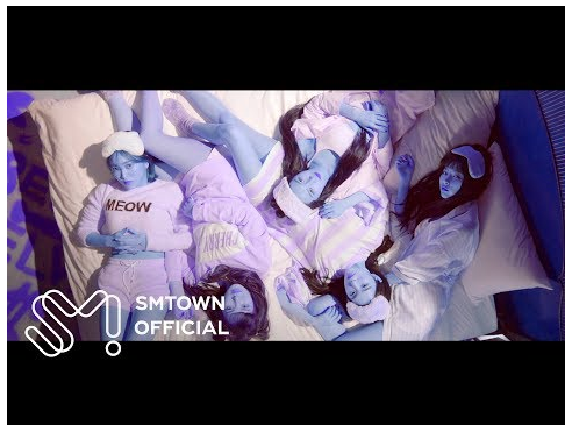

q


In [149]:
plt.figure(figsize=(10, 10))

for index, row in test.iterrows():
    vid, img, labeled = row
    
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    x = input()
    # use input to catgorize, etc
    if (x == 'q'): #because vim
        break
            

The goal for next session is to create a good way for manually labelling the data.

# Basically, COMING UP NEXT::: CLICKBAIT TINDER